<a href="https://colab.research.google.com/github/HarshanBathini/Skin-cancer-project.ipynb/blob/main/Skin_cancer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Skin Cancer Detection Project** - Complete Google Colab Implementation Guide
Project Overview
This comprehensive guide will walk you through building an AI-powered Skin Cancer Detection system using deep learning techniques in Google Colab, followed by deploying it as a web application. The project classifies skin lesions into 7 different categories using the HAM10000 dataset and CNN models.

In [ ]:
!pip install tensorflow keras matplotlib seaborn numpy pandas scikit-learn opencv-python pillow plotly streamlit

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet169, EfficientNetB4
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import os
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
print("✅ Libraries installed and imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

✅ Libraries installed and imported successfully!
TensorFlow version: 2.19.0


In [ ]:
# Load metadata
metadata = pd.read_csv('/content/HAM10000_metadata.csv')
print(f"Dataset shape: {metadata.shape}")
print("\nClass distribution:")
print(metadata['dx'].value_counts())

FileNotFoundError: [Errno 2] No such file or directory: '/content/HAM10000_metadata.csv'

In [ ]:
class_names = {
    'nv': 'Melanocytic nevi (Benign moles)',
    'mel': 'Melanoma (Malignant)',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma (Malignant)',
    'akiec': 'Actinic keratoses (Pre-cancerous)',
    'vasc': 'Vascular lesions (Benign)',
    'df': 'Dermatofibroma (Benign)'
}

In [ ]:
plt.figure(figsize=(12, 6))
class_counts = metadata['dx'].value_counts()
bars = plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='navy')
plt.title('Distribution of Skin Cancer Classes in HAM10000 Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Disease Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

NameError: name 'metadata' is not defined

<Figure size 1200x600 with 0 Axes>

NameError: name 'metadata' is not defined

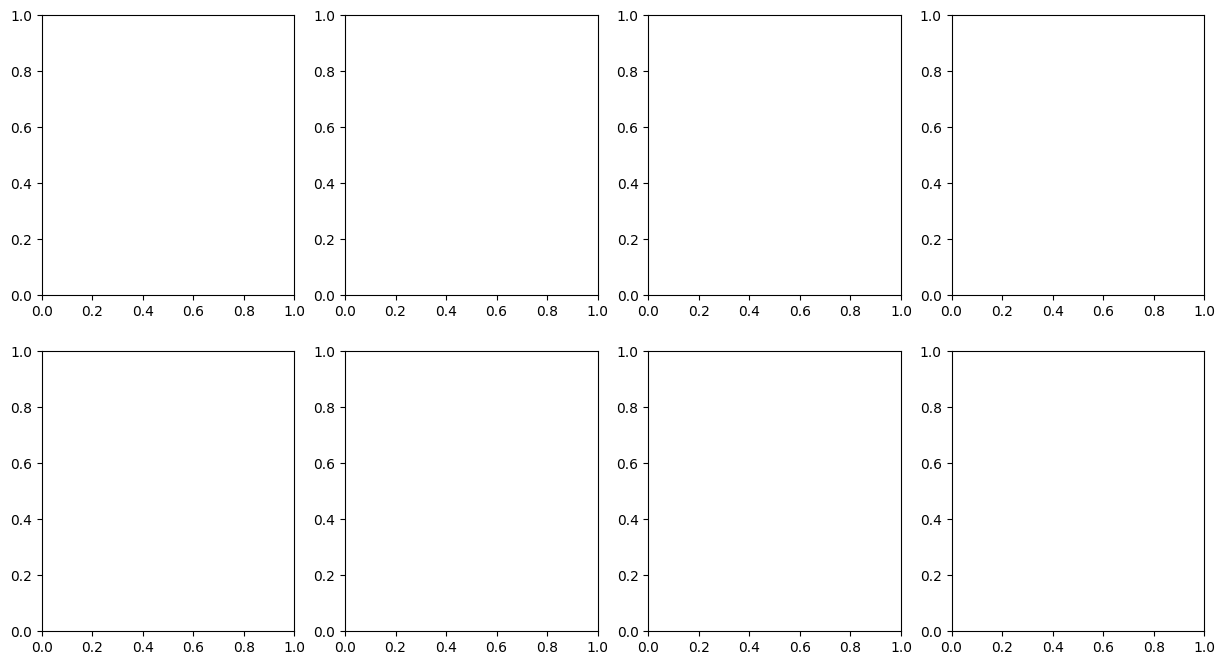

In [ ]:
# Display sample images from each class
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()

for idx, (class_code, class_name) in enumerate(class_names.items()):
    if idx < 7:  # We have 7 classes
        sample = metadata[metadata['dx'] == class_code].iloc[0] # Take the first sample
        image_id = sample['image_id']

        # Try to load image from both possible folders
        img_path = None
        for folder in ['/content/HAM10000_images_part_1', '/content/HAM10000_images_part_2']: # Corrected folder paths
            potential_path = f'{folder}/{image_id}.jpg'
            if os.path.exists(potential_path):
                img_path = potential_path
                break

        if img_path:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[idx].imshow(img)
            axes[idx].set_title(f'{class_code.upper()}: {class_name}', fontsize=10, fontweight='bold')
            axes[idx].axis('off')

# Remove empty subplot
axes[7].axis('off') # Corrected index for removing empty subplot
plt.tight_layout()
plt.show()

print("✅ Data exploration completed!")

In [ ]:
# Create image paths and labels
def create_image_paths_and_labels(metadata_df):
    """Create full image paths and encode labels"""
    image_paths = []
    labels = []
    # Create label encoding
    label_encoder = {class_code: idx for idx, class_code in enumerate(class_names.keys())}

    for _, row in metadata_df.iterrows():
        image_id = row['image_id']

In [ ]:
# Create image paths and labels
def create_image_paths_and_labels(metadata_df):
    """Create full image paths and encode labels"""
    image_paths = []
    labels = []
    # Create label encoding
    label_encoder = {class_code: idx for idx, class_code in enumerate(class_names.keys())}

    for _, row in metadata_df.iterrows():
        image_id = row['image_id']

        # Find image in either folder
        img_path = None
        for folder in ['/content/HAM10000_images_part_1', '/content/HAM10000_images_part_2']:
            potential_path = f'{folder}/{image_id}.jpg'
            if os.path.exists(potential_path):
                img_path = potential_path
                break

        if img_path:
            image_paths.append(img_path)
            labels.append(label_encoder[row['dx']])

    return np.array(image_paths), np.array(labels), label_encoder

# Now call the function and display the results
image_paths, labels, label_encoder = create_image_paths_and_labels(metadata)

print(f"\nTotal images found: {len(image_paths)}")
print(f"Total labels found: {len(labels)}")
print(f"Label encoder mapping: {label_encoder}")

NameError: name 'metadata' is not defined

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    image_paths, labels, test_size=0.3, random_state=42, stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")

# Image preprocessing function
def preprocess_image(image_path, target_size=(224, 224)):
    """Load and preprocess image"""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype('float32') / 255.0
    return img

NameError: name 'train_test_split' is not defined